In [1]:
%pip install llama-index

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 8.0 MB/s eta 0:00:0000:0100:01
  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached Deprecated-1.2.14-py2.py3-none-any.whl (9.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.0/169.0 KB 6.8 MB/s eta 0:00:00
  Using cached beautifulsoup4-4.12.2-py3-none-any.whl (142 kB)
  Using cached soupsieve-2.5-py3-none-any.whl (36 kB)
  Using cached wrapt-1.16.0-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (80 kB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached click-8.1.7-py3-none-any.whl (97 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.4/773.4 KB 7.9 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/home/joe96/projects/turing/character.ai/character_tasks/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart 

In [ ]:
import os

from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())
from pydantic import BaseModel
from llama_index.llms.openai import OpenAI


api_key = os.environ["OPENAI_API_KEY"]

In [3]:
%pip install llamaapi

You should consider upgrading via the '/home/joe96/projects/turing/character.ai/character_tasks/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [19]:
from llama_index.program import OpenAIPydanticProgram
from typing import List 


class Song(BaseModel):
    title: str
    length_seconds: int


class Album(BaseModel):
    name: str
    artist: str
    songs: List[Song]


prompt_template_str = """
Generate an album with 6 songs using the movie "{movie_name}" as inspiration.
"""
program = OpenAIPydanticProgram.from_defaults(
    llm=OpenAI(api_key=api_key, model="gpt-4-1106-preview", temperature=0),
    output_cls=Album, 
    prompt_template_str=prompt_template_str, 
    verbose=True
)
output = program(
    movie_name="Inter-galactic", 
    description="An album of songs inspired by the given movie"
)

Function call: Album with args: {
  "name": "Echoes of the Cosmos",
  "artist": "Stellar Harmonics",
  "songs": [
    {
      "title": "Stardust Memories",
      "length_seconds": 240
    },
    {
      "title": "Void Wanderers",
      "length_seconds": 210
    },
    {
      "title": "Nebula Dreams",
      "length_seconds": 180
    },
    {
      "title": "Quantum Odyssey",
      "length_seconds": 300
    },
    {
      "title": "Celestial Tides",
      "length_seconds": 270
    },
    {
      "title": "Gravity's Embrace",
      "length_seconds": 220
    }
  ]
}


In [21]:
import random
import json

file_list = os.listdir("../../jsonl_conversations/Batch 4/")
random.seed(0)
random_item = random.choice(file_list)

with open(f"../../jsonl_conversations/Batch 4/{random_item}") as f:
    conversation = json.load(f)

conversation

{'id': '18l9F7WDEqk8zVEJtKPKddmGQMv5Ejpc7',
 'metadata': {'topic': 'unit_testing_methodology > testing_asynchronous_code',
  'topic__top_level': 'unit_testing_methodology',
  'summary': 'User inquiring about testing async code and service availability.',
  'number_of_turns': '2'},
 'messages': [{'role': 'User',
   'content': "What's the proper way to test an async function that depends on an external service using mocks in pytest?",
   'type': 'markdown'},
  {'role': 'Assistant',
   'content': "There are a few key steps to ensure that the tests are properly isolated and asynchronous behavior is handled correctly. Here's how:\n\n**1. Install Necessary Packages:**\nEnsure you have `pytest`, `pytest-asyncio` (for async support), and `unittest.mock` (or `pytest-mock` for more features) installed.\n\n```shell\npip install pytest pytest-asyncio\n```\n\n\n**4. Write a Test Using Pytest:**\nUse the `pytest.mark.asyncio` decorator to mark your test as an async test. Use `unittest.mock` to creat

## Domain Classification

In [38]:
class DomainCategory(BaseModel):
    top_level: str
    sub_level: str
    detailed_level: str


def classify_conversation_by_domain(conversation: List[dict]) -> DomainCategory:
    DOMAIN_CATEGORIES = """
    - Problem Solving
    - Testing
    - Python Basics & Scripting
    - Databases
    - Data Analysis
    - Machine Learning
    - Web Development
    - System Design
    - Mobile Devlopment
    - Devops
    - Cloud Computing
    - Security
    - Other
    """

    prompt_template_str = """
    Categorize the following conversation by domain into one of the following top-level categories, then sub & detailed categories that you think is descriptive & appropriate:
    {categories}

    Conversation:
    {conversation}
    """

    program = OpenAIPydanticProgram.from_defaults(
        llm=OpenAI(api_key=api_key, model="gpt-4-1106-preview", temperature=0),
        output_cls=DomainCategory, 
        prompt_template_str=prompt_template_str, 
        verbose=True
    )
    output = program(
        categories=DOMAIN_CATEGORIES, 
        conversation=conversation["messages"],
        description="Categorize a conversation by domain"
    )
    return output


import concurrent.futures
results = []
def process_file(file):
    with open(f"../../jsonl_conversations/Batch 4/{file}") as f:
        conversation = json.load(f)
    output = classify_conversation_by_domain(conversation)
    record = {
        "id": conversation["id"],
    }
    record.update(output.dict())
    return record

with concurrent.futures.ThreadPoolExecutor(max_workers=20) as executor:
    futures = [executor.submit(process_file, file) for file in file_list]
    for future in concurrent.futures.as_completed(futures):
        results.append(future.result())

Function call: DomainCategory with args: {"top_level":"Problem Solving","sub_level":"Algorithms","detailed_level":"Sorting Algorithms"}
Function call: DomainCategory with args: {"top_level":"Testing","sub_level":"Software Testing","detailed_level":"Test Driven Development (TDD)"}
Function call: DomainCategory with args: {"top_level":"Python Basics & Scripting","sub_level":"Function Development","detailed_level":"Parameter Handling"}


/tmp/ipykernel_13349/2003633741.py:56: PydanticDeprecatedSince20:

The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.5/migration/



Function call: DomainCategory with args: {"top_level":"Testing","sub_level":"Database Testing","detailed_level":"Python Database Testing with pytest"}
Function call: DomainCategory with args: {"top_level":"Python Basics & Scripting","sub_level":"Advanced Python Concepts","detailed_level":"Descriptors and Type Enforcement"}
Function call: DomainCategory with args: {"top_level":"Python Basics & Scripting","sub_level":"String Manipulation","detailed_level":"String Formatting and Validation"}
Function call: DomainCategory with args: {"top_level":"Web Development","sub_level":"Backend Development","detailed_level":"Authentication and Security"}
Function call: DomainCategory with args: {"top_level":"Python Basics & Scripting","sub_level":"Error Handling","detailed_level":"Exception Handling and Conditional Logic"}
Function call: DomainCategory with args: {"top_level":"Python Basics & Scripting","sub_level":"String Manipulation","detailed_level":"String Formatting"}
Function call: DomainCateg

## Plotly Treemap plot

In [1]:
import pandas as pd
import plotly.express as px


df = pd.DataFrame(results)
fig = px.treemap(
    df, 
    path=['top_level', 'sub_level'], 
    title="Hierarchical Domain Classification",
    height=900,
    width=1600
)
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25)
)
fig.show()

NameError: name 'results' is not defined

In [57]:
import pandas as pd
import plotly.express as px


df = pd.DataFrame(results)
fig = px.treemap(
    df, 
    path=['top_level', 'sub_level', 'detailed_level'], 
    title="Hierarchical Domain Classification",
    height=900,
    width=1600
)
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25)
)
fig.show()

### Networkx Graph Plot

In [42]:
%pip install networkx

  Using cached networkx-3.2.1-py3-none-any.whl (1.6 MB)
You should consider upgrading via the '/home/joe96/projects/turing/character.ai/character_tasks/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [43]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for _, row in df.iterrows():
    G.add_edge(row['top_level'], row['sub_level'])
    G.add_edge(row['sub_level'], row['detailed_level'])

# Generate positions for each node
pos = nx.spring_layout(G)


import plotly.graph_objects as go

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=2, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
text = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    text.append(node)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    text=text,
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        color='#539caf',
        size=10,
        line_width=2))

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/'> Plotly</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.show()

## Programming Language Classification

In [59]:
from pydantic import Field


class ProgrammingLanguagePresence(BaseModel):
    language: str = Field(description="The programming language.")
    percentage: float = Field(description="The percentage of presence, between 0 and 1.")


def classify_conversation_by_programming_language(conversation: List[dict]):
    prompt_template_str = """
    Given the following conversation, what programming languages are being used?

    Conversation:
    {conversation}
    """

    program = OpenAIPydanticProgram.from_defaults(
        llm=OpenAI(api_key=api_key, model="gpt-4-1106-preview", temperature=0),
        output_cls=ProgrammingLanguagePresence, 
        prompt_template_str=prompt_template_str, 
        allow_multiple=True,
        verbose=True
    )
    output = program( 
        conversation=conversation["messages"],
        description="Predict the percentage of presence of programming languages in the given conversation"
    )
    return output


output = classify_conversation_by_programming_language(conversation)
output

Function call: ProgrammingLanguagePresence with args: {"language": "Python", "percentage": 0.8}
Function call: ProgrammingLanguagePresence with args: {"language": "Shell", "percentage": 0.2}


[ProgrammingLanguagePresence(language='Python', percentage=0.8),
 ProgrammingLanguagePresence(language='Shell', percentage=0.2)]

In [75]:
from pydantic import Field


class ProgrammingLanguagePresence(BaseModel):
    language: str = Field(description="The programming language.")
    percentage: float = Field(description="The percentage of presence, between 0 and 1.")


def classify_conversation_by_programming_language(conversation: List[dict]):
    prompt_template_str = """
    Given the following conversation, what "programming languages" are being used? (Must be programming languages like (python, java, SQL, C... etc) NOT libraries, frameworks or tools like (Flask, React, Pandas, Pytorch, keras... etc))

    Conversation:
    {conversation}
    """
    program = OpenAIPydanticProgram.from_defaults(
        llm=OpenAI(api_key=api_key, model="gpt-4-1106-preview", temperature=0),
        output_cls=ProgrammingLanguagePresence, 
        prompt_template_str=prompt_template_str, 
        allow_multiple=True,
    )
    try:
        output = program( 
            conversation=conversation["messages"],
            description="Predict the percentage of presence of programming languages in the given conversation"
        )
        return output
    except ValueError as e:
        print(e)
        return []



results = []
def process_file(file):
    with open(f"../../jsonl_conversations/Batch 4/{file}") as f:
        conversation = json.load(f)
    output = classify_conversation_by_programming_language(conversation)
    record = {
        "id": conversation["id"],
        "language_presence": output
    }
    return record

with concurrent.futures.ThreadPoolExecutor(max_workers=20) as executor:
    futures = [executor.submit(process_file, file) for file in file_list]
    for future in concurrent.futures.as_completed(futures):
        results.append(future.result())


# Accumulate in a dataframe for plotly (Sum of presence of each language is 1 row)
results_t = []
for result in results:
    for language_presence in result["language_presence"]:
        results_t.append({
            "id": result["id"],
            "language": language_presence.language.lower(),
            "percentage": language_presence.percentage
        })


df_languages = pd.DataFrame(results_t)
df_languages_agg = df_languages.groupby(["language"]).sum().sort_values(by="percentage", ascending=False).reset_index()
# df = df.merge(df_languages, on="id")
# df.head()
df_languages_agg

,language,id,percentage
12,python,1QFUDWwrIKEZVOgxdhFx3huQrIT91tMoD1_HLk3ZzRK97Q...,490.05
16,sql,143vHcCjK9VGbM72rSFA28FJd-q-zE3q41npUbGeHoZX4n...,8.20
0,bash,1Za8l7nXUMPkJjqg5EXrptRFjM3qC0Ngo1KgQjXD0BLiYX...,4.35
4,cython,1yiPR29lIUeOEbHniSnNxrQEvrJbQPaae1JKmrbRwcFPFS...,3.10
2,c,1hQTKPxAd_1Gi-cUOldy10058aRHL6LZi1rjFvHuSHvomo...,2.90
15,shell,1cYb6f8S6rmR8l-54rJQmq_Ax4OF0sdXD1Z3rGVssTIXAa...,1.80
18,tensorflow,1cmwfetpnWFJoFDH0hHRaUL2m9dwDOVVH18b0lS4iAv_Hx...,1.50
17,sqlite,1uyHR76pbi_KYK3yPVFnd02qt0ejSnVYg17lZgwZtEoB_x...,1.10
7,html,1KgQjXD0BLiYX_BVmDfPmmq7lLKy7lVAn1gi-BKQhHwtyp...,1.10
11,numpy,1ZKqC8965SSscX-ZztIwEkvVVBnCmJydR1KqcjgH6Evtk1...,1.00


In [99]:
import plotly.graph_objects as go

# Create the data for the bar chart
data = [
    go.Bar(
        x=df_languages_agg['percentage'],
        y=df_languages_agg['language'],
        orientation='h',
        marker=dict(
            color='rgba(25, 25, 25, 0.9)',
            line=dict(
                color='rgba(25, 25, 25, 1.0)',
                width=2
            )
        ),
        hovertemplate='Percentage: %{x:.2f}<extra></extra>'
    )
]

data = list(reversed(data))

# Create the layout for the chart
layout = go.Layout(
    title='Programming Language Breakdown (Log Scale)',
    xaxis=dict(
        type='log',
        title='Value (log scale)'
    ),
    yaxis=dict(
        title='Category'
    ),
    margin=dict(
        l=100,
        r=20,
        t=70,
        b=70
    ),
    paper_bgcolor='rgb(255, 255, 255)',
    plot_bgcolor='rgb(255, 255, 255)',
    width=600,
    height=600,
    showlegend=False
)

# Create the figure and plot the chart
fig = go.Figure(data=data, layout=layout)
fig.show()

## Dependency Classification

In [84]:
from pydantic import Field


class DependencyUsage(BaseModel):
    dependency: str = Field(description="The tool/library/package imported.")
    percentage: float = Field(description="The percentage of presence, between 0 and 1.")


def tag_conversations_by_dependency_usage(conversation: List[dict]):
    prompt_template_str = """
    Given the following conversation, What dependencies are used? 
    Dependencies are any imported libraries, frameworks or external services/tools like (Flask, React, Pandas, Pytorch, keras, MySQL... etc))

    Conversation:
    {conversation}
    """
    program = OpenAIPydanticProgram.from_defaults(
        llm=OpenAI(api_key=api_key, model="gpt-4-1106-preview", temperature=0),
        output_cls=DependencyUsage, 
        prompt_template_str=prompt_template_str, 
        allow_multiple=True,
    )
    try:
        output = program( 
            conversation=conversation["messages"],
            description="Predict the percentage of presence of dependencies in the given conversation"
        )
        return output
    except ValueError as e:
        print(e)
        return []



# results = []
# def process_file(file):
#     with open(f"../../jsonl_conversations/Batch 4/{file}") as f:
#         conversation = json.load(f)
#     output = tag_conversations_by_dependency_usage(conversation)
#     record = {
#         "id": conversation["id"],
#         "dependency_presence": output
#     }
#     return record

# with concurrent.futures.ThreadPoolExecutor(max_workers=20) as executor:
#     futures = [executor.submit(process_file, file) for file in file_list]
#     for future in concurrent.futures.as_completed(futures):
#         results.append(future.result())


# Accumulate in a dataframe for plotly (Sum of presence of each language is 1 row)
results_t = []
for result in results:
    for dependency_presence in result["dependency_presence"]:
        results_t.append({
            "id": result["id"],
            "dependency": dependency_presence.dependency.lower(),
            "percentage": dependency_presence.percentage
        })


df_dependencies = pd.DataFrame(results_t)
df_dependencies_agg = df_dependencies.groupby(["dependency"]).sum().sort_values(by="percentage", ascending=False).reset_index()
# df = df.merge(df_languages, on="id")
# df.head()
df_dependencies_agg

,dependency,id,percentage
0,unittest,1sHmSGBtk-oJ-7dTSDE8ShBUeaqP110y61ZE1BneHVJRYz...,22.75
1,python,1ZkhNG1rM54_uANRm8mmb78_zxZyUuCjn1V4eNXZ71luQJ...,20.50
2,numpy,1Md6vlARc-gMIcF4osiG5bONyITknrVR5113QFXHYhR2Fk...,15.83
3,pytest,143vHcCjK9VGbM72rSFA28FJd-q-zE3q41GuN4OpvODxX4...,15.50
4,matplotlib,14rH6_y37bhJu_5YgWB1q3JcMxLiTyfm21WWV2usI6p_bJ...,14.30
...,...,...,...
307,linux,11yQQ1tj-PCC-JZYvcHEssVTSdsSbYY2y,0.00
308,list,1UyYsGbq-Q2p2yjUxYR8TRAB3bwF2wUwV,0.00
309,singleton,1tqU85fFyNeDizC-ud9v6zQoVzpqv2iUW,0.00
310,manimgl,1mmNoxUaJ4com6AOM1V6ne6-kcrBKS8Xb,0.00


In [91]:
%pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.6/513.6 KB 3.1 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/home/joe96/projects/turing/character.ai/character_tasks/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


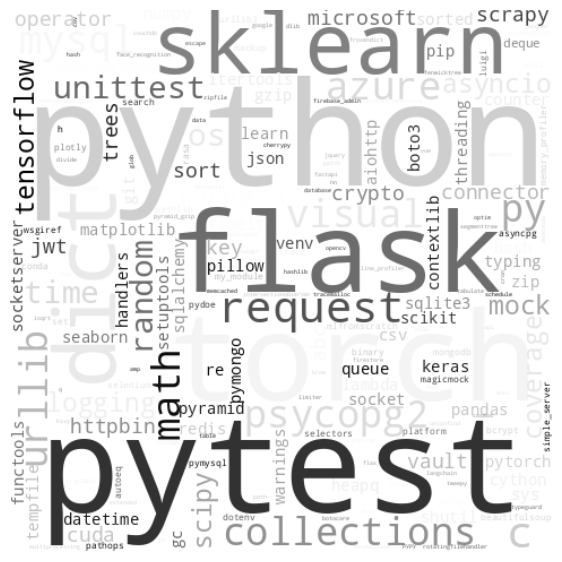

In [101]:
dependencies = df_dependencies_agg["dependency"].tolist()

# Generate a professional and elegant word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Create the word cloud
wordcloud = WordCloud(
    width=480, height=480, margin=0,
    background_color="white", colormap="Greys",
    collocations=False
).generate(" ".join(dependencies))

# Display the generated image:
plt.figure(figsize=(7, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Turns Breakdown

In [103]:
def count_n_turns(messages):
    starting_role = messages[0]["role"]
    n_turns = 0
    for message in messages:
        if message["role"] == starting_role:
            n_turns += 1
    return n_turns


results = []
for file in file_list:
    with open(f"../../jsonl_conversations/Batch 4/{file}") as f:
        conversation = json.load(f)
    id = conversation["id"]
    n_turns = count_n_turns(conversation["messages"])
    results.append({
        "id": id,
        "colab_link": f"https://colab.research.google.com/drive/{id}",
        "n_turns": n_turns
    })

df_turn_count = pd.DataFrame(results)
df_turn_count_agg = df_turn_count[["n_turns"]].groupby(["n_turns"]).count().reset_index()
df_turn_count_agg

,n_turns
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,10


In [104]:
df_turn_count

,id,colab_link,n_turns
0,12EkLbqhOebbUraSDmW-xnEtcSlcdDRFP,https://colab.research.google.com/drive/12EkLb...,4
1,1_HLk3ZzRK97Qmxg6_X-XUa8MJtZfhNa2,https://colab.research.google.com/drive/1_HLk3...,3
2,1sHmSGBtk-oJ-7dTSDE8ShBUeaqP110y6,https://colab.research.google.com/drive/1sHmSG...,2
3,1F8Y3ih-JO6yN-uOgzcPC0bCkz6m7Jyt7,https://colab.research.google.com/drive/1F8Y3i...,3
4,10cugdMCEIXMQnwKVLcru-rd2N8tu64Qs,https://colab.research.google.com/drive/10cugd...,3
...,...,...,...
507,18OBn8VwiBxiVAidtkwJskkt0CE2LlO5I,https://colab.research.google.com/drive/18OBn8...,2
508,1WxS6udc_AfScoFkUvbjViV358S1iNxLP,https://colab.research.google.com/drive/1WxS6u...,6
509,1AswrNSJSs5YRadnCNvh4ez8GYGAielTT,https://colab.research.google.com/drive/1AswrN...,3
510,1JLNiicR75dherrYAYY7Ux0xY74eG90ab,https://colab.research.google.com/drive/1JLNii...,3


## Use Case Classification

## User Behavioral Tagging

In [ ]:
"""
- Initial Prompt
- Continuation Follow up
    - Incrementally Build
    - Supplement/Extend
    - Integrate with something else
    - Request for clarification/elaboration
    - Request alternatives
- Pivoting Follow up
    - Change in topic
    - Change in direction
    - Change in focus or goal
- Respond to Assistant
    - Answer a question
    - End the conversation
    - Clarify an ambiguity
- User makes mistakes
- User is confused
- User is frustrated
- User contradicts themselves
- User confronts assistant about mistakes
- Other
"""